In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [3]:
cd Documents

C:\Users\add_l\Documents


In [9]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.columns = ['Month', 'Milk in Pounds per Cow']
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
df.drop(168,axis=0,inplace=True)

In [1]:
df['Month'] = pd.to_datetime(df['Month'])


NameError: name 'pd' is not defined

In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


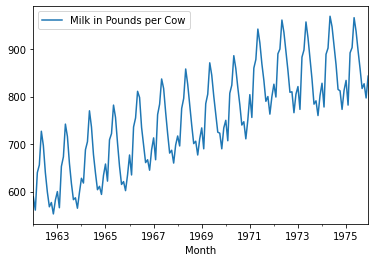

In [9]:
df.plot()

In [10]:
 time_series = df['Milk in Pounds per Cow']

In [11]:
type(time_series)

pandas.core.series.Series

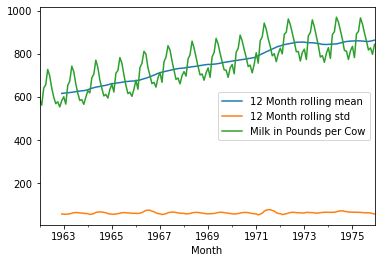

In [16]:
time_series.rolling(12).mean().plot(label='12 Month rolling mean')
time_series.rolling(12).std().plot(label='12 Month rolling std')
time_series.plot()
plt.legend()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
decom = seasonal_decompose(time_series)

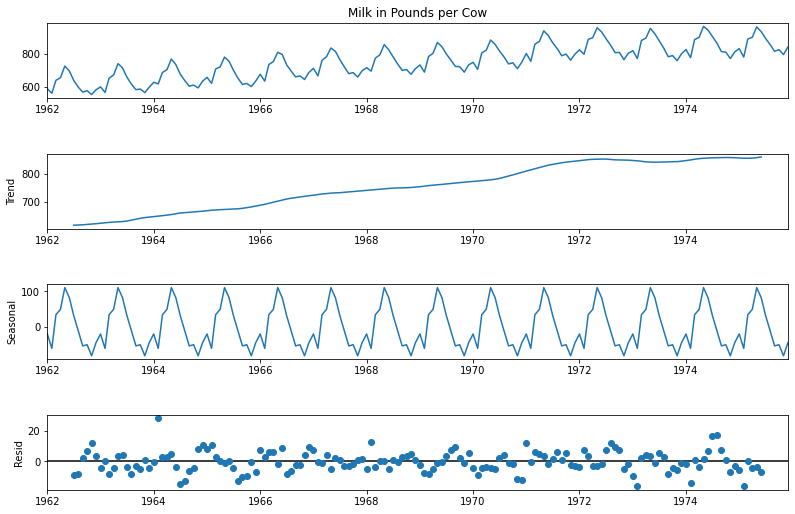

In [26]:
fig = decom.plot()
fig.set_size_inches(12,8)

In [27]:
from statsmodels.tsa.stattools import adfuller

In [29]:
result = adfuller(df['Milk in Pounds per Cow'])
result

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [33]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']

    for value,label in zip(result, labels):
        print(label+ ":" + str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print("No strong evidence against null hypothesis")
        print('Failed to reject null hypothesis')
        print('Data has a unit root and is non-stationary')
        

Augmented Dicky Fuller Test
ADF Test Statistic:-1.3038115874221294
p-value:0.6274267086030316
# of lags:13
Num of Observations used:154
No strong evidence against null hypothesis
Failed to reject null hypothesis
Data has a unit root and is non-stationary


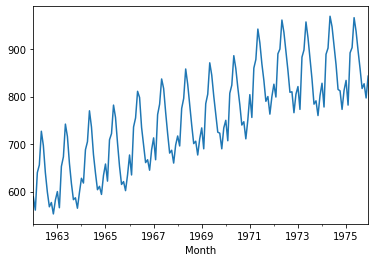

In [41]:
df['Milk in Pounds per Cow'].plot()
adf_check(df['Milk in Pounds per Cow'])

In [36]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

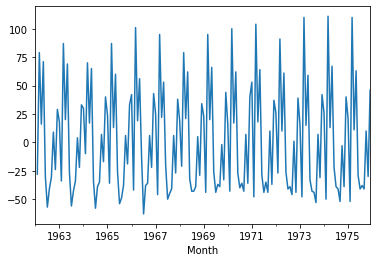

In [37]:
df['First Difference'].plot()

In [38]:
adf_check(df['First Difference'].dropna())

Augmented Dicky Fuller Test
ADF Test Statistic:-3.0549955586530704
p-value:0.030068004001785647
# of lags:14
Num of Observations used:152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [39]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [40]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky Fuller Test
ADF Test Statistic:-14.327873645603301
p-value:1.1126989332084581e-26
# of lags:11
Num of Observations used:154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [42]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

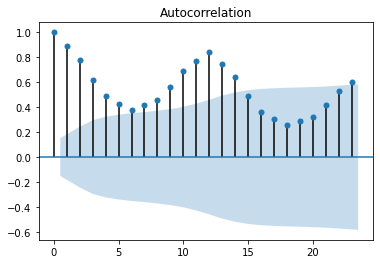

In [45]:
fig_first = plot_acf(df['Milk in Pounds per Cow'].dropna())

In [46]:
from pandas.plotting import autocorrelation_plot

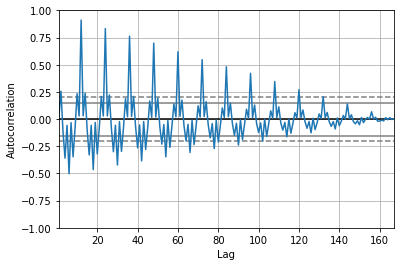

In [47]:
autocorrelation_plot(df['First Difference'].dropna())

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order=(0,1,0), seasonal_order=(1,1,1,12))

C:\Users\add_l\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\add_l\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [51]:
results = model.fit()

In [52]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 12 May 2021   AIC                           1074.131
Time:                                      01:15:47   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

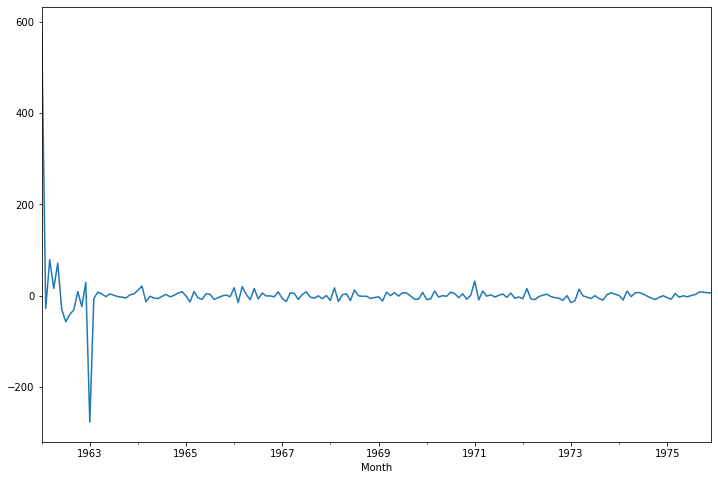

In [54]:
results.resid.plot(figsize = (12,8))

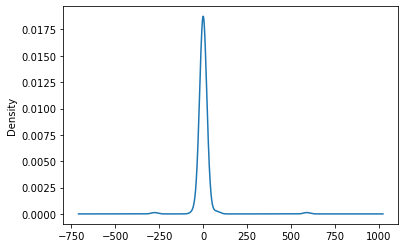

In [55]:
results.resid.plot(kind='kde')

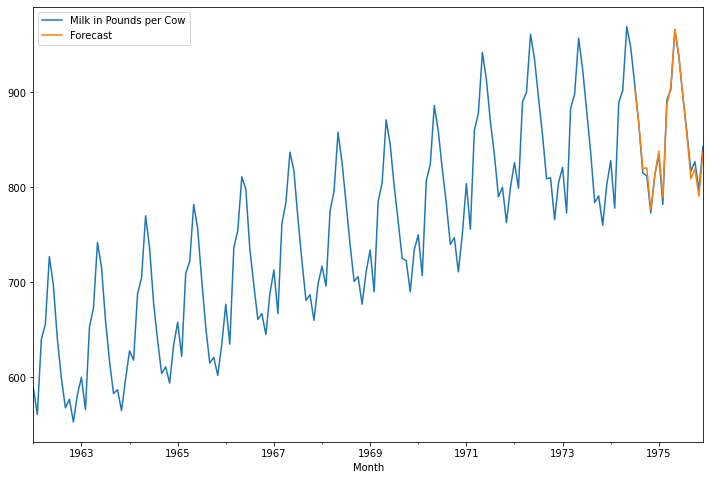

In [58]:
df['Forecast'] = results.predict(start = 150, end = 250)
df[['Milk in Pounds per Cow', 'Forecast']].plot(figsize=(12,8))

In [59]:
df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Forecast
Month,,,,
1975-08-01,858.0,-38.0,3.0,855.358617
1975-09-01,817.0,-41.0,-3.0,808.841269
1975-10-01,827.0,10.0,51.0,819.323183
1975-11-01,797.0,-30.0,-40.0,790.427500
1975-12-01,843.0,46.0,76.0,837.063646


In [60]:
from pandas.tseries.offsets import DateOffset

In [61]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(1,24)]

In [68]:
future_dates
future_df = pd.DataFrame(index = future_dates, columns=df.columns)

In [69]:
final_df = pd.concat([df,future_df])

In [71]:
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Forecast
1977-07-01,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN


In [72]:
final_df['forecast_future'] = results.predict(start=168, end=194)

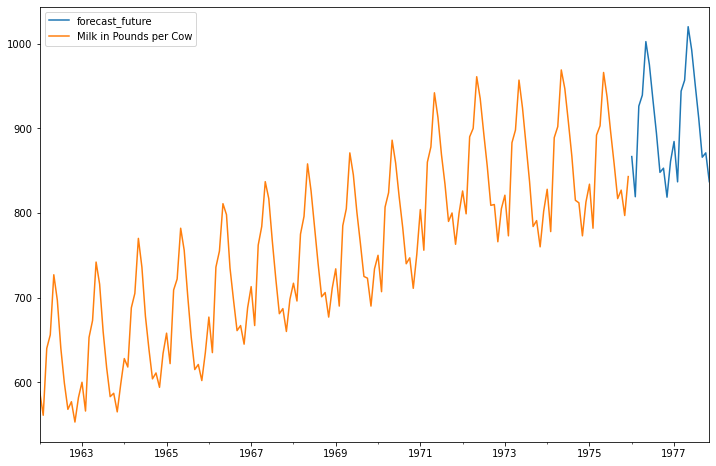

In [73]:
final_df[['forecast_future', 'Milk in Pounds per Cow']].plot(figsize=(12,8))